In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sympy

In [7]:
def newton_method(f, epsilon, x_0):
    """
    利用牛顿法迭代逼近方程的根
    :param f: 方程 f(x) = 0 ,sympy表达式类型
    :param epsilon: 最大误差
    :param x_0: 迭代起点
    :return:
    """
    f_diff = sympy.diff(f,'x') # 对x的一阶导数
    f_iter = x - f / f_diff # 迭代函数
    f_iter_diff = sympy.diff(f_iter,'x') # 迭代函数一阶导数
    if abs(f_iter_diff.evalf(subs={'x':x_0})) > 1:
        priunt('iter function may not converge') 

    i = 1
    x_next = f_iter.evalf(subs={'x':x_0}) # x_(k+1)
    x_list = [x_0,x_next]

    # 利用迭代函数迭代,记录每次的x点
    while abs(x_list[i] - x_list[i-1]) > epsilon:
        i += 1
        x_next = f_iter.evalf(subs={'x': x_list[i-1]})
        x_list.append(x_next)
    return np.array(x_list,dtype='float')

In [26]:
x = sympy.Symbol('x')
f = x**3 - x - 1
epsilon = 0.0001
x_0 = 1.5
x_list = newton_method(f,epsilon,x_0)
x_list

array([1.5       , 1.34782609, 1.3252004 , 1.32471817, 1.32471796])

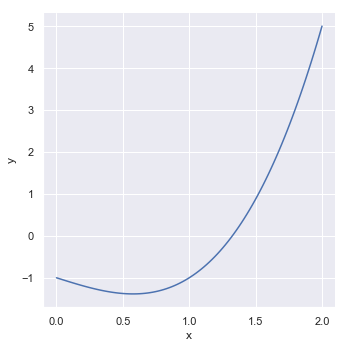

In [27]:
f = sympy.lambdify('x',f,'numpy') #convert a SymPy expression to numpy lambda
xx = np.linspace(0,2,100)
yy = f(xx)
sns.set(color_codes=True)
df = pd.DataFrame.from_dict(dict(x=xx,y=yy))
g = sns.relplot(x='x',y='y',data=df,kind='line')


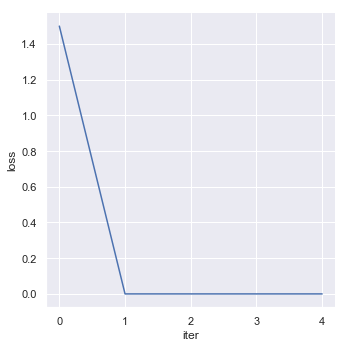

In [28]:
x_list
loss = [0]
loss.extend(x_list[1:]) 
loss = x_list - loss
loss
sns.relplot(x='iter',y='loss',kind='line',data=pd.DataFrame.from_dict(
    dict(iter=range(len(loss)),loss=loss))
)